In [60]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [61]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [63]:
# !git clone https://github.com/jaddoescad/ants_and_bees.git

In [64]:
!ls

01_Linear_Regression.ipynb		ants_and_bees
02_Perceptron.ipynb			City.jpg
03_Deep_Neural_Networks.ipynb		data
04_DNN_MNIST.ipynb			LICENSE
05_Convolutional Neural Networks.ipynb	output.mp4
06_CIFAR_10.ipynb			README.md
07_Transfer_Learning.ipynb		StarryNight.jpg
08_Style_Transfer.ipynb			vgg16-397923af.pth


In [65]:
!ls ants_and_bees

train  val


In [66]:
!ls ants_and_bees/train

ants  bees


In [67]:
!ls ants_and_bees/train/ants

0013035.jpg		   408393566_b5b694119b.jpg
1030023514_aad5c608f9.jpg  424119020_6d57481dab.jpg
1095476100_3906d8afde.jpg  424873399_47658a91fb.jpg
1099452230_d1949d3250.jpg  450057712_771b3bfc91.jpg
116570827_e9c126745d.jpg   45472593_bfd624f8dc.jpg
1225872729_6f0856588f.jpg  459694881_ac657d3187.jpg
1262877379_64fcada201.jpg  460372577_f2f6a8c9fc.jpg
1269756697_0bce92cdab.jpg  460874319_0a45ab4d05.jpg
1286984635_5119e80de1.jpg  466430434_4000737de9.jpg
132478121_2a430adea2.jpg   470127037_513711fd21.jpg
1360291657_dc248c5eea.jpg  474806473_ca6caab245.jpg
1368913450_e146e2fb6d.jpg  475961153_b8c13fd405.jpg
1473187633_63ccaacea6.jpg  484293231_e53cfc0c89.jpg
148715752_302c84f5a4.jpg   49375974_e28ba6f17e.jpg
1489674356_09d48dde0a.jpg  506249802_207cd979b4.jpg
149244013_c529578289.jpg   506249836_717b73f540.jpg
150801003_3390b73135.jpg   512164029_c0a66b8498.jpg
150801171_cd86f17ed8.jpg   512863248_43c8ce579b.jpg
154124431_65460430f2.jpg   518773929_734dbc5ff4.jpg
162603798_40b51f1654.jpg 

In [68]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])


transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.ImageFolder('ants_and_bees/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('ants_and_bees/val', transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=False)

In [69]:
print(len(training_dataset))
print(len(validation_dataset))

246
153


In [70]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [71]:
# !pip install Pillow

In [72]:
classes = ('ant', 'bee')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'bee')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

Text(0.5, 1.0, 'ant')

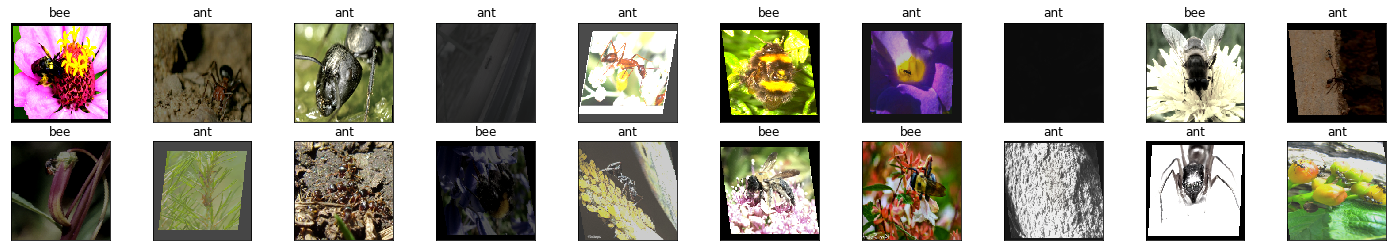

In [73]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

In [74]:
model = models.vgg16(pretrained=True)

In [75]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [76]:
for param in model.features.parameters():
    param.requires_grad = False

In [77]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)
print(model.classifier[6].out_features)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

2


In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.00001)

In [79]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
  
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

  
    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)

            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0367, acc 0.5650 
validation loss: 0.0339, validation acc 0.6405 
epoch : 2
training loss: 0.0301, acc 0.7236 
validation loss: 0.0297, validation acc 0.7320 
epoch : 3
training loss: 0.0276, acc 0.7439 
validation loss: 0.0250, validation acc 0.8235 
epoch : 4
training loss: 0.0271, acc 0.7724 
validation loss: 0.0219, validation acc 0.8497 
epoch : 5
training loss: 0.0242, acc 0.7805 
validation loss: 0.0177, validation acc 0.8954 
epoch : 6
training loss: 0.0228, acc 0.8211 
validation loss: 0.0186, validation acc 0.8627 
epoch : 7
training loss: 0.0212, acc 0.8049 
validation loss: 0.0173, validation acc 0.8824 
epoch : 8
training loss: 0.0192, acc 0.8130 
validation loss: 0.0141, validation acc 0.8954 
epoch : 9
training loss: 0.0195, acc 0.8293 
validation loss: 0.0144, validation acc 0.8824 
epoch : 10
training loss: 0.0190, acc 0.8415 
validation loss: 0.0141, validation acc 0.8954 


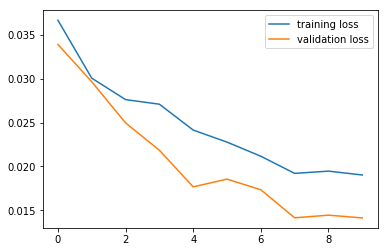

In [80]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

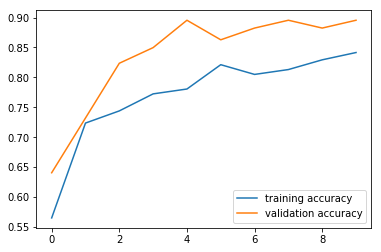

In [81]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [82]:
# !pip3 install pillow

In [83]:
import PIL.ImageOps

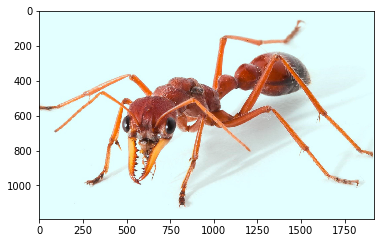

In [84]:
import requests
from PIL import Image

url = 'http://cdn.sci-news.com/images/enlarge5/image_6425e-Giant-Red-Bull-Ant.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

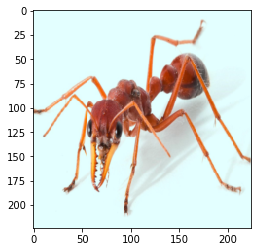

In [85]:
img = transform(img) 
plt.imshow(im_convert(img))

In [86]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

ant


Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'bee (ant)')

Text(0.5, 1.0, 'bee (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

Text(0.5, 1.0, 'ant (ant)')

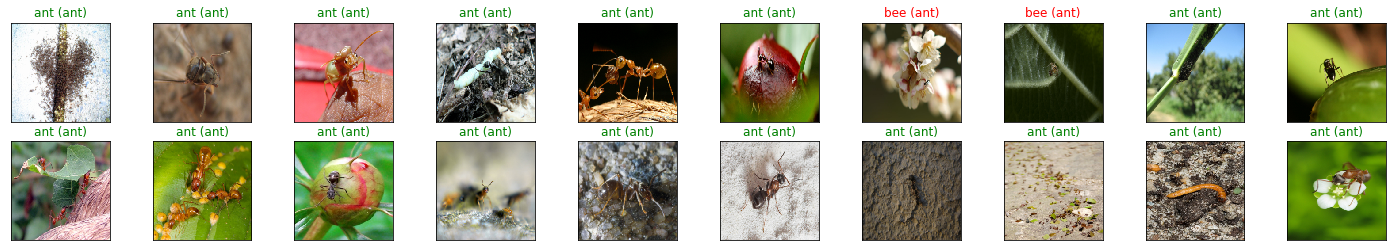

In [87]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)


fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))